In [175]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import os
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

4.  In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.


In [176]:
df_iris = data('iris')

In [177]:
type(df_iris)

pandas.core.frame.DataFrame

print the first 3 rows

In [178]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


print the number of rows and columns (shape)

In [179]:
df_iris.shape

(150, 5)

print the column names

In [180]:
print(df_iris.columns.tolist()) #From notes

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']


print the data type of each column

In [181]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

print the summary statistics for each of the numeric variables

In [182]:
print(df_iris.describe())

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [183]:
#From class
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


5. Read the data from this google sheet into a dataframe, df_google.

In [184]:


sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
    
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


print the first 3 rows

In [185]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


print the number of rows and columns

In [186]:
df_google.shape

(891, 12)

print the column names

In [187]:
print(df_google.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


print the data type of each column

In [188]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [189]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

print the summary statistics for each of the numeric variables

In [190]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


print the unique values for each of your categorical variables

In [191]:
df_google.value_counts

<bound method DataFrame.value_counts of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                    Name     Sex   Age  SibSp  \
0                                Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                                 Heikkinen, Miss. Laina  female  26.0      0   
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                               Allen, Mr. William Henry    male  35.0      0   
..               

6.  Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

In [192]:
df_excel = pd.read_excel('train.xlsx')
df_excel

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


assign the first 100 rows to a new dataframe, df_excel_sample

In [193]:
df_excel_sample = df_excel[df_excel.PassengerId <= 100]
df_excel_sample.shape

(100, 12)

print the number of rows of your original dataframe

In [194]:
df_excel.shape[0]

891

print the first 5 column names

In [195]:
print(df_excel.columns[:5])

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')


print the column names that have a data type of object

In [196]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [197]:
df_excel.select_dtypes(include='object').columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

compute the range for each of the numeric variables.

In [198]:
df_excel.select_dtypes(exclude='object').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [199]:
df_excel.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [200]:
numbers = df_excel[['Age', 'Fare']]

In [201]:
numbers

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [202]:
numbers.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [203]:
age_range = max(numbers.Age) - min(numbers.Age)
age_range

79.58

In [204]:
fare_range = numbers.Fare.max() - numbers.Fare.min()
fare_range

512.3292

everything else is a range of 1 numerically

Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [205]:
from env import get_db_url
import os

In [206]:
# def get_titanic_data():
#     filename = 'titanic.csv'
    
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         # read the SQL query into a dataframe
#         titanic_db = pd.read_sql('SELECT * FROM passengers', get_db_url('titanic_db'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         titanic_db.to_csv(filename)
        
#         return titanic_db

In [207]:
# def get_iris_data():
#     filename = 'iris.csv'
    
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else:
#         #read the SQL query into a dataframe
#         iris_db = pd.read_sql('SELECT * FROM species JOIN measurements USING (species_id)', get_db_url('iris_db'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         iris_db.to_csv(filename)
        
#     return iris_db

Use the function defined in acquire.py to load the Titanic data.

In [208]:
titanic_db = acquire.get_titanic_data()

In [209]:
iris_db = acquire.get_iris_data()

In [210]:
# def get_telco_data():
#     query = '''
#     SELECT * 
#     FROM customers
#     JOIN contract_types USING (contract_type_id)
#     JOIN internet_service_types USING (internet_service_type_id)
#     JOIN payment_types USING (payment_type_id);
#     '''
    
#     filename = 'telco.csv'
#     if os.path.isfile(filename):
#         return pd.read_csv(filename)
#     else: 
#         #read the SQL query into a dataframe
#         telco_churn_db = pd.read_sql(query, get_db_url('telco_churn'))
        
#         # Write that dataframe to disk for later.  Called "caching" the data for later.
#         telco_churn_db.to_csv(filename)
        
#     return telco_churn_db

In [211]:
os.path.exists('iris.csv') #Troubleshooting I want to remember

True

Use the function defined in acquire.py to load the iris data.

In [212]:
iris_db = acquire.get_iris_data()
iris_db

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2
5,5,1,setosa,6,5.4,3.9,1.7,0.4
6,6,1,setosa,7,4.6,3.4,1.4,0.3
7,7,1,setosa,8,5.0,3.4,1.5,0.2
8,8,1,setosa,9,4.4,2.9,1.4,0.2
9,9,1,setosa,10,4.9,3.1,1.5,0.1


Drop the species_id and measurement_id columns.

In [213]:
iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])

Rename the species_name column to just species.

In [214]:
iris_db = iris_db.rename({'species_name': 'species'}, axis=1)

Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [215]:
iris_db

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width
0,0,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,2,setosa,4.7,3.2,1.3,0.2
3,3,setosa,4.6,3.1,1.5,0.2
4,4,setosa,5.0,3.6,1.4,0.2
5,5,setosa,5.4,3.9,1.7,0.4
6,6,setosa,4.6,3.4,1.4,0.3
7,7,setosa,5.0,3.4,1.5,0.2
8,8,setosa,4.4,2.9,1.4,0.2
9,9,setosa,4.9,3.1,1.5,0.1


In [216]:
dummy_iris_db = pd.get_dummies(iris_db['species'], dummy_na=False, drop_first=[True])

In [217]:
dummy_iris_db

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [218]:
iris_db = pd.concat([iris_db, dummy_iris_db], axis=1)
iris_db

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
5,5,setosa,5.4,3.9,1.7,0.4,0,0
6,6,setosa,4.6,3.4,1.4,0.3,0,0
7,7,setosa,5.0,3.4,1.5,0.2,0,0
8,8,setosa,4.4,2.9,1.4,0.2,0,0
9,9,setosa,4.9,3.1,1.5,0.1,0,0


Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [219]:
def prep_iris():
    iris_db = acquire.get_iris_data()
    iris_db = iris_db.drop(columns=['species_id', 'measurement_id'])
    iris_db = iris_db.rename({'species_name': 'species'}, axis=1)
    dummy_iris_db = pd.get_dummies(iris_db['species'], dummy_na=False, drop_first=[True])
    iris_db = pd.concat([iris_db, dummy_iris_db], axis=1)
    return iris_db

In [220]:
prep_iris()

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
5,5,setosa,5.4,3.9,1.7,0.4,0,0
6,6,setosa,4.6,3.4,1.4,0.3,0,0
7,7,setosa,5.0,3.4,1.5,0.2,0,0
8,8,setosa,4.4,2.9,1.4,0.2,0,0
9,9,setosa,4.9,3.1,1.5,0.1,0,0


# Titanic Dataset

Use the function defined in acquire.py to load the Titanic data.

In [221]:
titanic_db = acquire.get_titanic_data()

In [222]:
titanic_db

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [223]:
titanic_db.deck.value_counts().sum()

203

In [224]:
titanic_db.age.value_counts().sum()

714

Drop any unnecessary, unhelpful, or duplicated columns.

In [225]:
titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [226]:
dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True, True])

In [227]:
dummy_titanic_db.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [228]:
titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
titanic_db

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [229]:
def prep_titanic():
    titanic_db = acquire.get_titanic_data()
    titanic_db = titanic_db.drop(columns=['age', 'embarked', 'class', 'deck'])
    dummy_titanic_db = pd.get_dummies(titanic_db[['sex', 'embark_town']], dummy_na=False, drop_first = [True])#, True])
    titanic_db = pd.concat([titanic_db, dummy_titanic_db], axis=1)
    return titanic_db

In [249]:
prep_titanic()

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


# Telco Dataset

Use the function defined in acquire.py to load the Telco data.

In [231]:
telco_churn_db = acquire.get_telco_data()

In [232]:
telco_churn_db

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.60,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.90,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.90,267.4,Yes,Month-to-month,Fiber optic,Mailed check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2,1,2,9987-LUTYD,Female,0,No,No,13,...,Yes,No,No,No,55.15,742.9,No,One year,DSL,Mailed check
7039,7039,1,2,1,9992-RRAMN,Male,0,Yes,No,22,...,No,No,Yes,Yes,85.10,1873.7,Yes,Month-to-month,Fiber optic,Electronic check
7040,7040,2,1,1,9992-UJOEL,Male,0,No,No,2,...,No,No,No,Yes,50.30,92.75,No,Month-to-month,DSL,Mailed check
7041,7041,2,1,3,9993-LHIEB,Male,0,Yes,Yes,67,...,Yes,No,Yes,No,67.85,4627.65,No,Two year,DSL,Mailed check


In [233]:
telco_churn_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [234]:
for col in telco_churn_db.columns:
    print(col.upper())
    print(telco_churn_db[col].value_counts(dropna=False))

UNNAMED: 0
0       1
4691    1
4702    1
4701    1
4700    1
       ..
2344    1
2343    1
2342    1
2341    1
7042    1
Name: Unnamed: 0, Length: 7043, dtype: int64
PAYMENT_TYPE_ID
1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
INTERNET_SERVICE_TYPE_ID
2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64
CONTRACT_TYPE_ID
1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64
CUSTOMER_ID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64
GENDER
Male      3555
Female    3488
Name: gender, dtype: int64
SENIOR_CITIZEN
0    5901
1    1142
Name: senior_citizen, dtype: int64
PARTNER
No     3641
Yes    3402
Name: partner, dtype: int64
DEPENDENTS
No     4933
Yes    2110
Name: dependents, dtype: int64
TENURE
1     613
72    362
2     238
3     200
4     176
71    1

In [235]:
telco_churn_db.head().T #from class review

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3


Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [236]:
pd.crosstab(telco_churn_db.payment_type, telco_churn_db.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [237]:
pd.crosstab(telco_churn_db.internet_service_type, telco_churn_db.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


In [238]:
pd.crosstab(telco_churn_db.contract_type, telco_churn_db.contract_type_id)

contract_type_id,1,2,3
contract_type,,,
Month-to-month,3875,0,0
One year,0,1473,0
Two year,0,0,1695


In [239]:
telco_churn_db = telco_churn_db.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])

In [240]:
telco_churn_db.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes


Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [241]:
dummy_telco_churn_db = pd.get_dummies(telco_churn_db[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=True)

In [242]:
dummy_telco_churn_db

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,1,0,1,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7039,1,1,0,1,0,1,0,0,0,0,...,1,1,1,0,0,1,0,0,1,0
7040,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7041,1,1,1,1,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1


In [243]:
telco_churn_db = pd.concat([telco_churn_db, dummy_telco_churn_db], axis=1)

In [244]:
telco_churn_db.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes


In [245]:
telco_churn_db

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,...,0,1,0,1,0,0,0,0,0,1
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,...,1,0,0,0,0,0,0,0,0,1
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,...,0,1,1,0,0,1,0,0,1,0
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,...,1,1,1,0,0,1,0,0,1,0
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,...,0,0,0,1,0,0,0,0,0,1
7039,7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,...,1,1,1,0,0,1,0,0,1,0
7040,7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,...,0,1,0,0,0,0,0,0,0,1
7041,7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1


Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

# COME BACK TO THIS!!!

In [250]:
def prep_telco():
    telco_churn_db = acquire.get_telco_data()
    telco_churn_db = telco_churn_db.drop(columns=['payment_type_id', 'internet_service_type_id', 'contract_type_id'])
    dummy_telco_churn_db = pd.get_dummies(telco_churn_db[['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn', 'contract_type', 'internet_service_type', 'payment_type']], dummy_na=False, drop_first=True)
    telco_churn_db = pd.concat([telco_churn_db, dummy_telco_churn_db], axis=1)
    return telco_churn_db

In [252]:
prep_telco().T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Unnamed: 0,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ,0013-MHZWF,0013-SMEOE,0014-BMAQU,0015-UOCOJ,0016-QLJIS,...,9975-SKRNR,9978-HYCIN,9979-RGMZT,9985-MWVIX,9986-BONCE,9987-LUTYD,9992-RRAMN,9992-UJOEL,9993-LHIEB,9995-HOTOH
gender,Female,Male,Male,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Female,Female,Female,Male,Male,Male,Male
senior_citizen,0,0,0,1,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
partner,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes,...,No,Yes,No,No,No,No,Yes,No,Yes,Yes
dependents,Yes,No,No,No,No,Yes,No,No,No,Yes,...,No,Yes,No,No,No,No,No,No,Yes,Yes
tenure,9,9,4,13,3,9,71,63,7,65,...,1,47,7,1,4,13,22,2,67,63
phone_service,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
multiple_lines,No,Yes,No,No,No,No,No,Yes,No,Yes,...,No,No,No,No,No,No,Yes,No,No,No phone service
online_security,No,No,No,No,No,No,Yes,Yes,Yes,Yes,...,No internet service,No,No,No,No internet service,Yes,No,No,Yes,Yes


# Split your data

Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [253]:
def split_data(df, stratify_col):
    train_validate, test = train_test_split(df, test_size = .2, random_state=123, stratify=df[stratify_col])
    train, validate = train_test_split(train_validate, test_size=.25, random_state=123, stratify=train_validate[stratify_col])
    return train, validate, test

Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [254]:
iris_db

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
5,5,setosa,5.4,3.9,1.7,0.4,0,0
6,6,setosa,4.6,3.4,1.4,0.3,0,0
7,7,setosa,5.0,3.4,1.5,0.2,0,0
8,8,setosa,4.4,2.9,1.4,0.2,0,0
9,9,setosa,4.9,3.1,1.5,0.1,0,0


In [255]:
iris_train, iris_validate, iris_test = split_data(iris_db, stratify_col = 'species')

In [256]:
iris_train

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0
53,53,versicolor,5.5,2.3,4.0,1.3,1,0
20,20,setosa,5.4,3.4,1.7,0.2,0,0
50,50,versicolor,7.0,3.2,4.7,1.4,1,0
54,54,versicolor,6.5,2.8,4.6,1.5,1,0
52,52,versicolor,6.9,3.1,4.9,1.5,1,0


Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [257]:
titanic_train, titanic_validate, titanic_test = split_data(titanic_db, stratify_col = 'survived')
titanic_train

,Unnamed: 0,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
455,455,455,1,3,male,0,0,7.8958,Cherbourg,1,1,0,0
380,380,380,1,1,female,0,0,227.5250,Cherbourg,1,0,0,0
492,492,492,0,1,male,0,0,30.5000,Southampton,1,1,0,1
55,55,55,1,1,male,0,0,35.5000,Southampton,1,1,0,1
243,243,243,0,3,male,0,0,7.1250,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,695,695,0,2,male,0,0,13.5000,Southampton,1,1,0,1
128,128,128,1,3,female,1,1,22.3583,Cherbourg,0,0,0,0
636,636,636,0,3,male,0,0,7.9250,Southampton,1,1,0,1
222,222,222,0,3,male,0,0,8.0500,Southampton,1,1,0,1


Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [261]:
telco_train, telco_validate, telco_test = split_data(telco_churn_db, stratify_col='churn')
telco_train

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,...,0,1,0,1,0,0,0,0,0,0
2479,2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,...,0,0,0,1,0,0,1,0,1,0
5889,5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,...,0,1,1,0,0,0,0,0,0,1
6087,6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,...,1,1,0,0,1,0,0,0,0,0
785,785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,...,1,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6102,6102,8642-GVWRF,Female,0,Yes,No,2,Yes,No,No,...,0,0,1,0,0,1,0,0,0,0
356,356,0523-VNGTF,Female,1,No,No,52,No,No phone service,No,...,0,1,0,0,0,0,0,0,1,0
1756,1756,2568-BRGYX,Male,0,No,No,4,Yes,No,No,...,0,1,1,0,0,1,0,0,1,0
2127,2127,3057-VJJQE,Male,0,No,No,35,Yes,Yes,Yes,...,0,0,0,0,1,0,0,0,0,1


# Exploratory Analysis

# Part 1

Continue in your classification_exercises.ipynb notebook. As always, add, commit, and push your changes.

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

Acquire, prepare & split your data.

In [387]:
iris = prep_iris()
iris

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,0,setosa,5.1,3.5,1.4,0.2,0,0
1,1,setosa,4.9,3.0,1.4,0.2,0,0
2,2,setosa,4.7,3.2,1.3,0.2,0,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
5,5,setosa,5.4,3.9,1.7,0.4,0,0
6,6,setosa,4.6,3.4,1.4,0.3,0,0
7,7,setosa,5.0,3.4,1.5,0.2,0,0
8,8,setosa,4.4,2.9,1.4,0.2,0,0
9,9,setosa,4.9,3.1,1.5,0.1,0,0


In [388]:
iris_train, iris_validate, iris_test = split_data(iris, stratify_col='species')

In [389]:
iris_train

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0
53,53,versicolor,5.5,2.3,4.0,1.3,1,0
20,20,setosa,5.4,3.4,1.7,0.2,0,0
50,50,versicolor,7.0,3.2,4.7,1.4,1,0
54,54,versicolor,6.5,2.8,4.6,1.5,1,0
52,52,versicolor,6.9,3.1,4.9,1.5,1,0


## Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [390]:
column_names = list(iris_train.columns.values)
iris_train.species.value_counts()

versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64

In [391]:
iris_train.iloc[:, 2].describe()

count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64

sepal_length


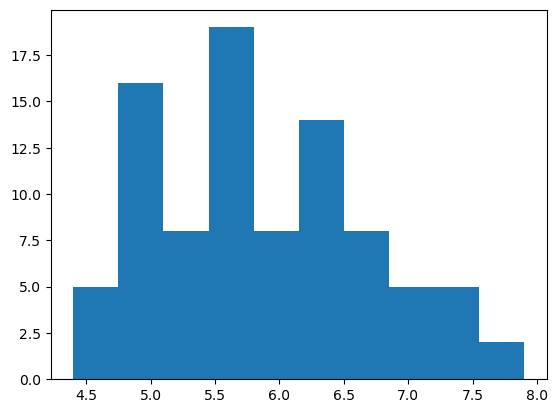

sepal_length


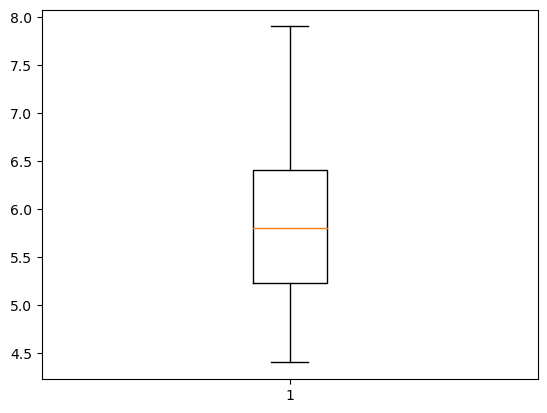

sepal_length statistics: 
count    90.000000
mean      5.875556
std       0.792282
min       4.400000
25%       5.225000
50%       5.800000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64
sepal_width


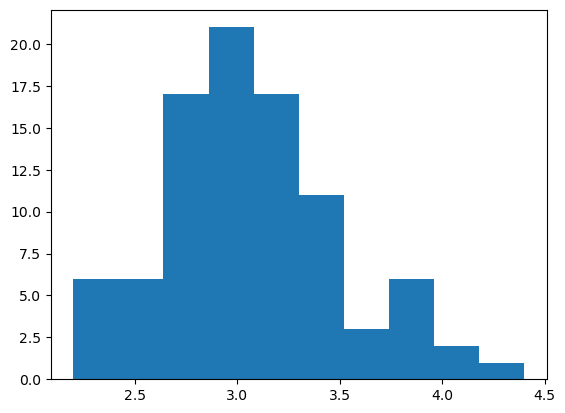

sepal_width


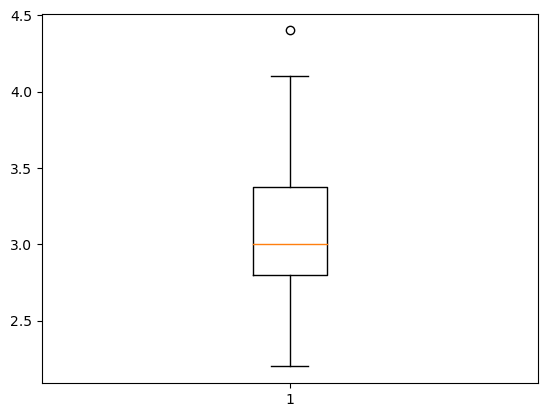

sepal_width statistics: 
count    90.000000
mean      3.070000
std       0.436135
min       2.200000
25%       2.800000
50%       3.000000
75%       3.375000
max       4.400000
Name: sepal_width, dtype: float64
petal_length


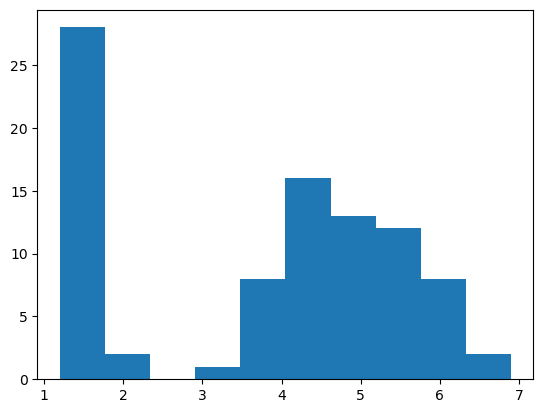

petal_length


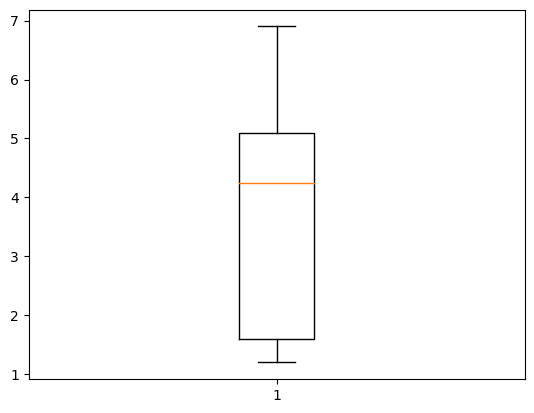

petal_length statistics: 
count    90.000000
mean      3.782222
std       1.742114
min       1.200000
25%       1.600000
50%       4.250000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64
petal_width


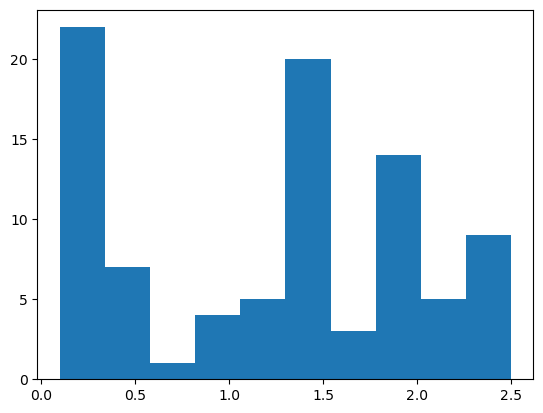

petal_width


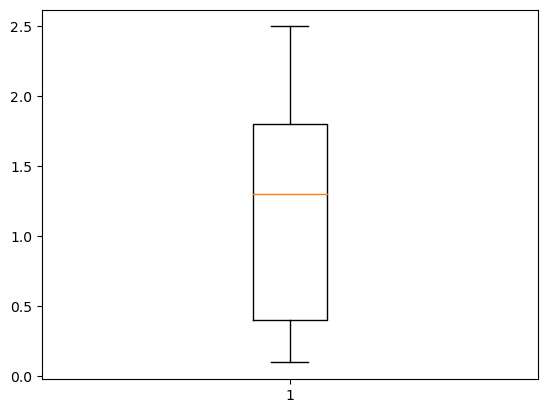

petal_width statistics: 
count    90.000000
mean      1.203333
std       0.755422
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.500000
Name: petal_width, dtype: float64
versicolor


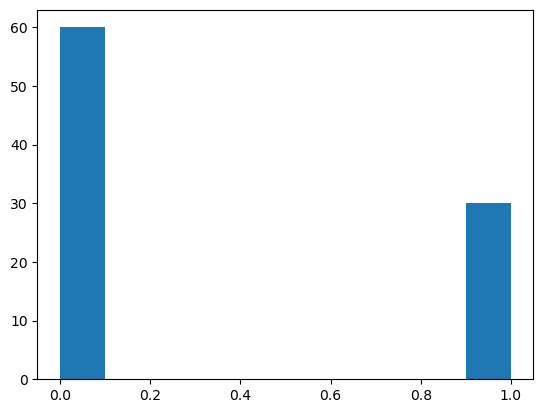

versicolor


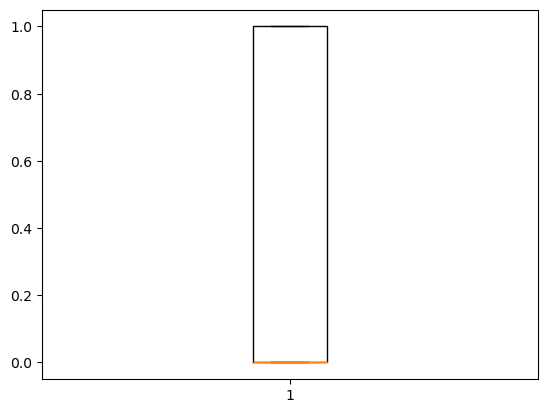

versicolor statistics: 
count    90.000000
mean      0.333333
std       0.474045
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: versicolor, dtype: float64


In [392]:
i = 2
while i <= 6:
    print(f'{column_names[i]}')
    plt.hist(iris_train.iloc[:, i])
    plt.show()
    print(f'{column_names[i]}')
    plt.boxplot(iris_train.iloc[:, i])
    plt.show()
    print(f'{column_names[i]} statistics: ')
    print(iris_train.iloc[:, i].describe())
    i += 1

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [393]:
iris_train.species.value_counts()

versicolor    30
virginica     30
setosa        30
Name: species, dtype: int64

<Axes: >

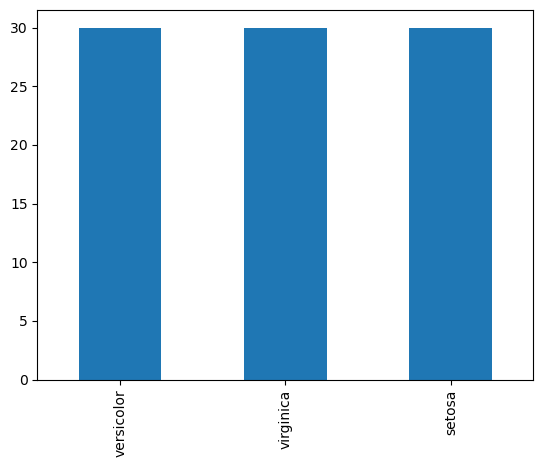

In [394]:
iris_train.species.value_counts().plot.bar()

Document takeaways & any actions.

Sepal length and width seems normally distributed or there seems to be no distinction between species while there seems to be some kind of deliniating factor with petal length and width

## Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

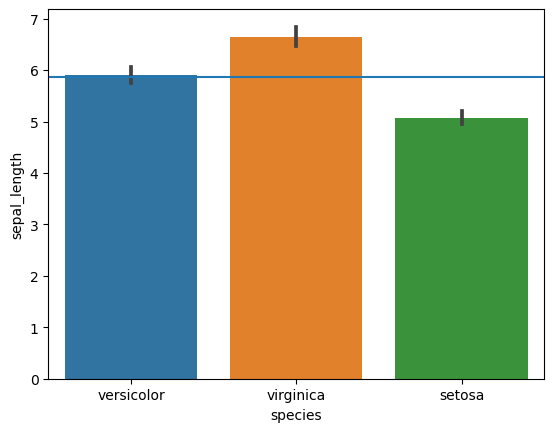

In [395]:
sns.barplot(x='species', y='sepal_length', data=iris_train)
plt.axhline(y=iris_train.sepal_length.mean()) #Try again on review

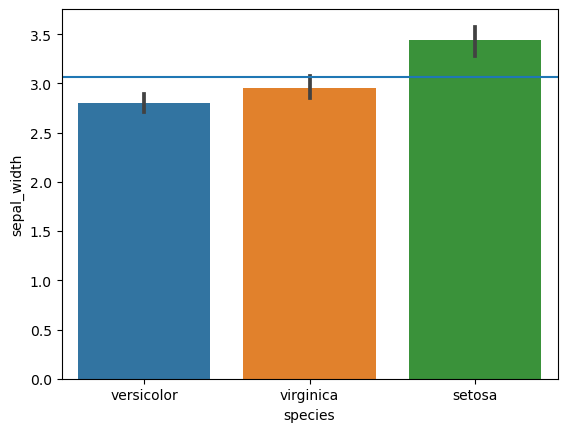

In [396]:
sns.barplot(x='species', y='sepal_width', data=iris_train)
plt.axhline(y=iris_train.sepal_width.mean())

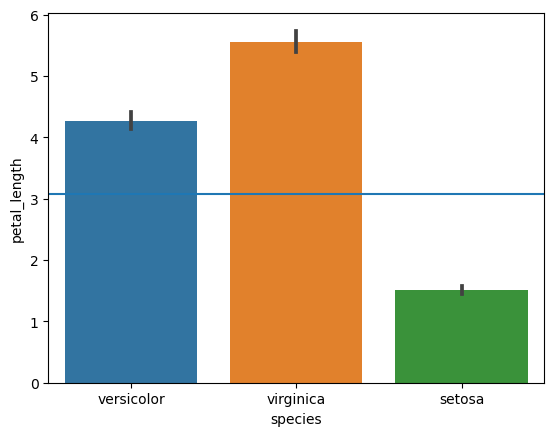

In [397]:
sns.barplot(x='species', y='petal_length', data=iris_train)
plt.axhline(y=iris_train.sepal_width.mean())

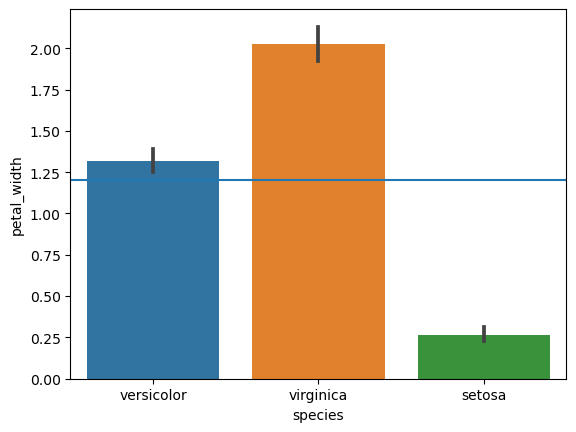

In [398]:
sns.barplot(x='species', y='petal_width', data=iris_train)
plt.axhline(y=iris_train.petal_width.mean())

In [399]:
# iris_train.plot.bar(x='species', y=mean(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']))

In [400]:
#. For each measurement type, compute the descriptive statistics for each species.

In [401]:
iris_train[iris_train.species == 'setosa'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,22.400000,5.070000,3.446667,1.510000,0.266667,0.0,0.0
std,14.542684,0.356371,0.420782,0.178789,0.121296,0.0,0.0
min,1.000000,4.400000,2.300000,1.200000,0.100000,0.0,0.0
25%,9.500000,4.825000,3.200000,1.400000,0.200000,0.0,0.0
50%,21.500000,5.000000,3.400000,1.500000,0.200000,0.0,0.0
75%,34.250000,5.375000,3.775000,1.600000,0.375000,0.0,0.0
max,48.000000,5.800000,4.400000,1.900000,0.600000,0.0,0.0


In [402]:
iris_train[iris_train.species == 'versicolor'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.0,30.0
mean,74.200000,5.91000,2.806667,4.273333,1.320000,1.0,0.0
std,15.884063,0.47659,0.281539,0.409317,0.193694,0.0,0.0
min,50.000000,4.90000,2.300000,3.300000,1.000000,1.0,0.0
25%,58.250000,5.60000,2.625000,4.000000,1.200000,1.0,0.0
50%,76.500000,5.80000,2.800000,4.250000,1.300000,1.0,0.0
75%,87.750000,6.17500,3.000000,4.575000,1.475000,1.0,0.0
max,97.000000,7.00000,3.400000,5.100000,1.800000,1.0,0.0


In [403]:
iris_train[iris_train.species == 'virginica'].describe()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0
mean,124.566667,6.646667,2.956667,5.563333,2.023333,0.0,1.0
std,14.243409,0.533520,0.309263,0.492344,0.286095,0.0,0.0
min,100.000000,5.800000,2.200000,4.800000,1.500000,0.0,1.0
25%,112.500000,6.300000,2.800000,5.125000,1.800000,0.0,1.0
50%,125.500000,6.500000,3.000000,5.550000,2.000000,0.0,1.0
75%,136.000000,6.900000,3.100000,5.800000,2.300000,0.0,1.0
max,149.000000,7.900000,3.800000,6.900000,2.500000,0.0,1.0


For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Hypotheses combined:
    
    Null Hyp: For randomly chosen flowers the probability of the metric (i.e petal_width) of the randomly chosen virginica flower will be greater than that metric for versicolor will be equal to the probability that said metric will be greater for versicolor than for virginica.
    Alt Hyp: The probability of the metric (i.e. petal width) for one species will be greater than the other.
    I will choose a p-value of .05

In [404]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].petal_width, iris_train[iris_train.species == 'versicolor'].petal_width)

MannwhitneyuResult(statistic=883.0, pvalue=1.274471779403707e-10)

There is sufficient evidence to reject the null.  There is a difference in petal widths.

In [405]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].petal_length, iris_train[iris_train.species == 'versicolor'].petal_length)

MannwhitneyuResult(statistic=892.5, pvalue=6.02995793051305e-11)

There is sufficient evidence to reject the null.  There is a difference in petal widths.

In [406]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].sepal_width, iris_train[iris_train.species == 'versicolor'].sepal_width)

MannwhitneyuResult(statistic=575.0, pvalue=0.06370930409956933)

There is not sufficient evidence to reject the null.  There doesn't seem to be a difference in sepal_widths.

In [407]:
stats.mannwhitneyu(iris_train[iris_train.species == 'virginica'].sepal_length, iris_train[iris_train.species == 'versicolor'].sepal_length)

MannwhitneyuResult(statistic=767.0, pvalue=2.7482419419191076e-06)

Document takeaways & any actions.

There is sufficient evidence to reject the null.  There is a difference in sepal lengths.

In [408]:
iris_train

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
123,123,virginica,6.3,2.7,4.9,1.8,0,1
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0
53,53,versicolor,5.5,2.3,4.0,1.3,1,0
20,20,setosa,5.4,3.4,1.7,0.2,0,0
50,50,versicolor,7.0,3.2,4.7,1.4,1,0
54,54,versicolor,6.5,2.8,4.6,1.5,1,0
52,52,versicolor,6.9,3.1,4.9,1.5,1,0


## Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

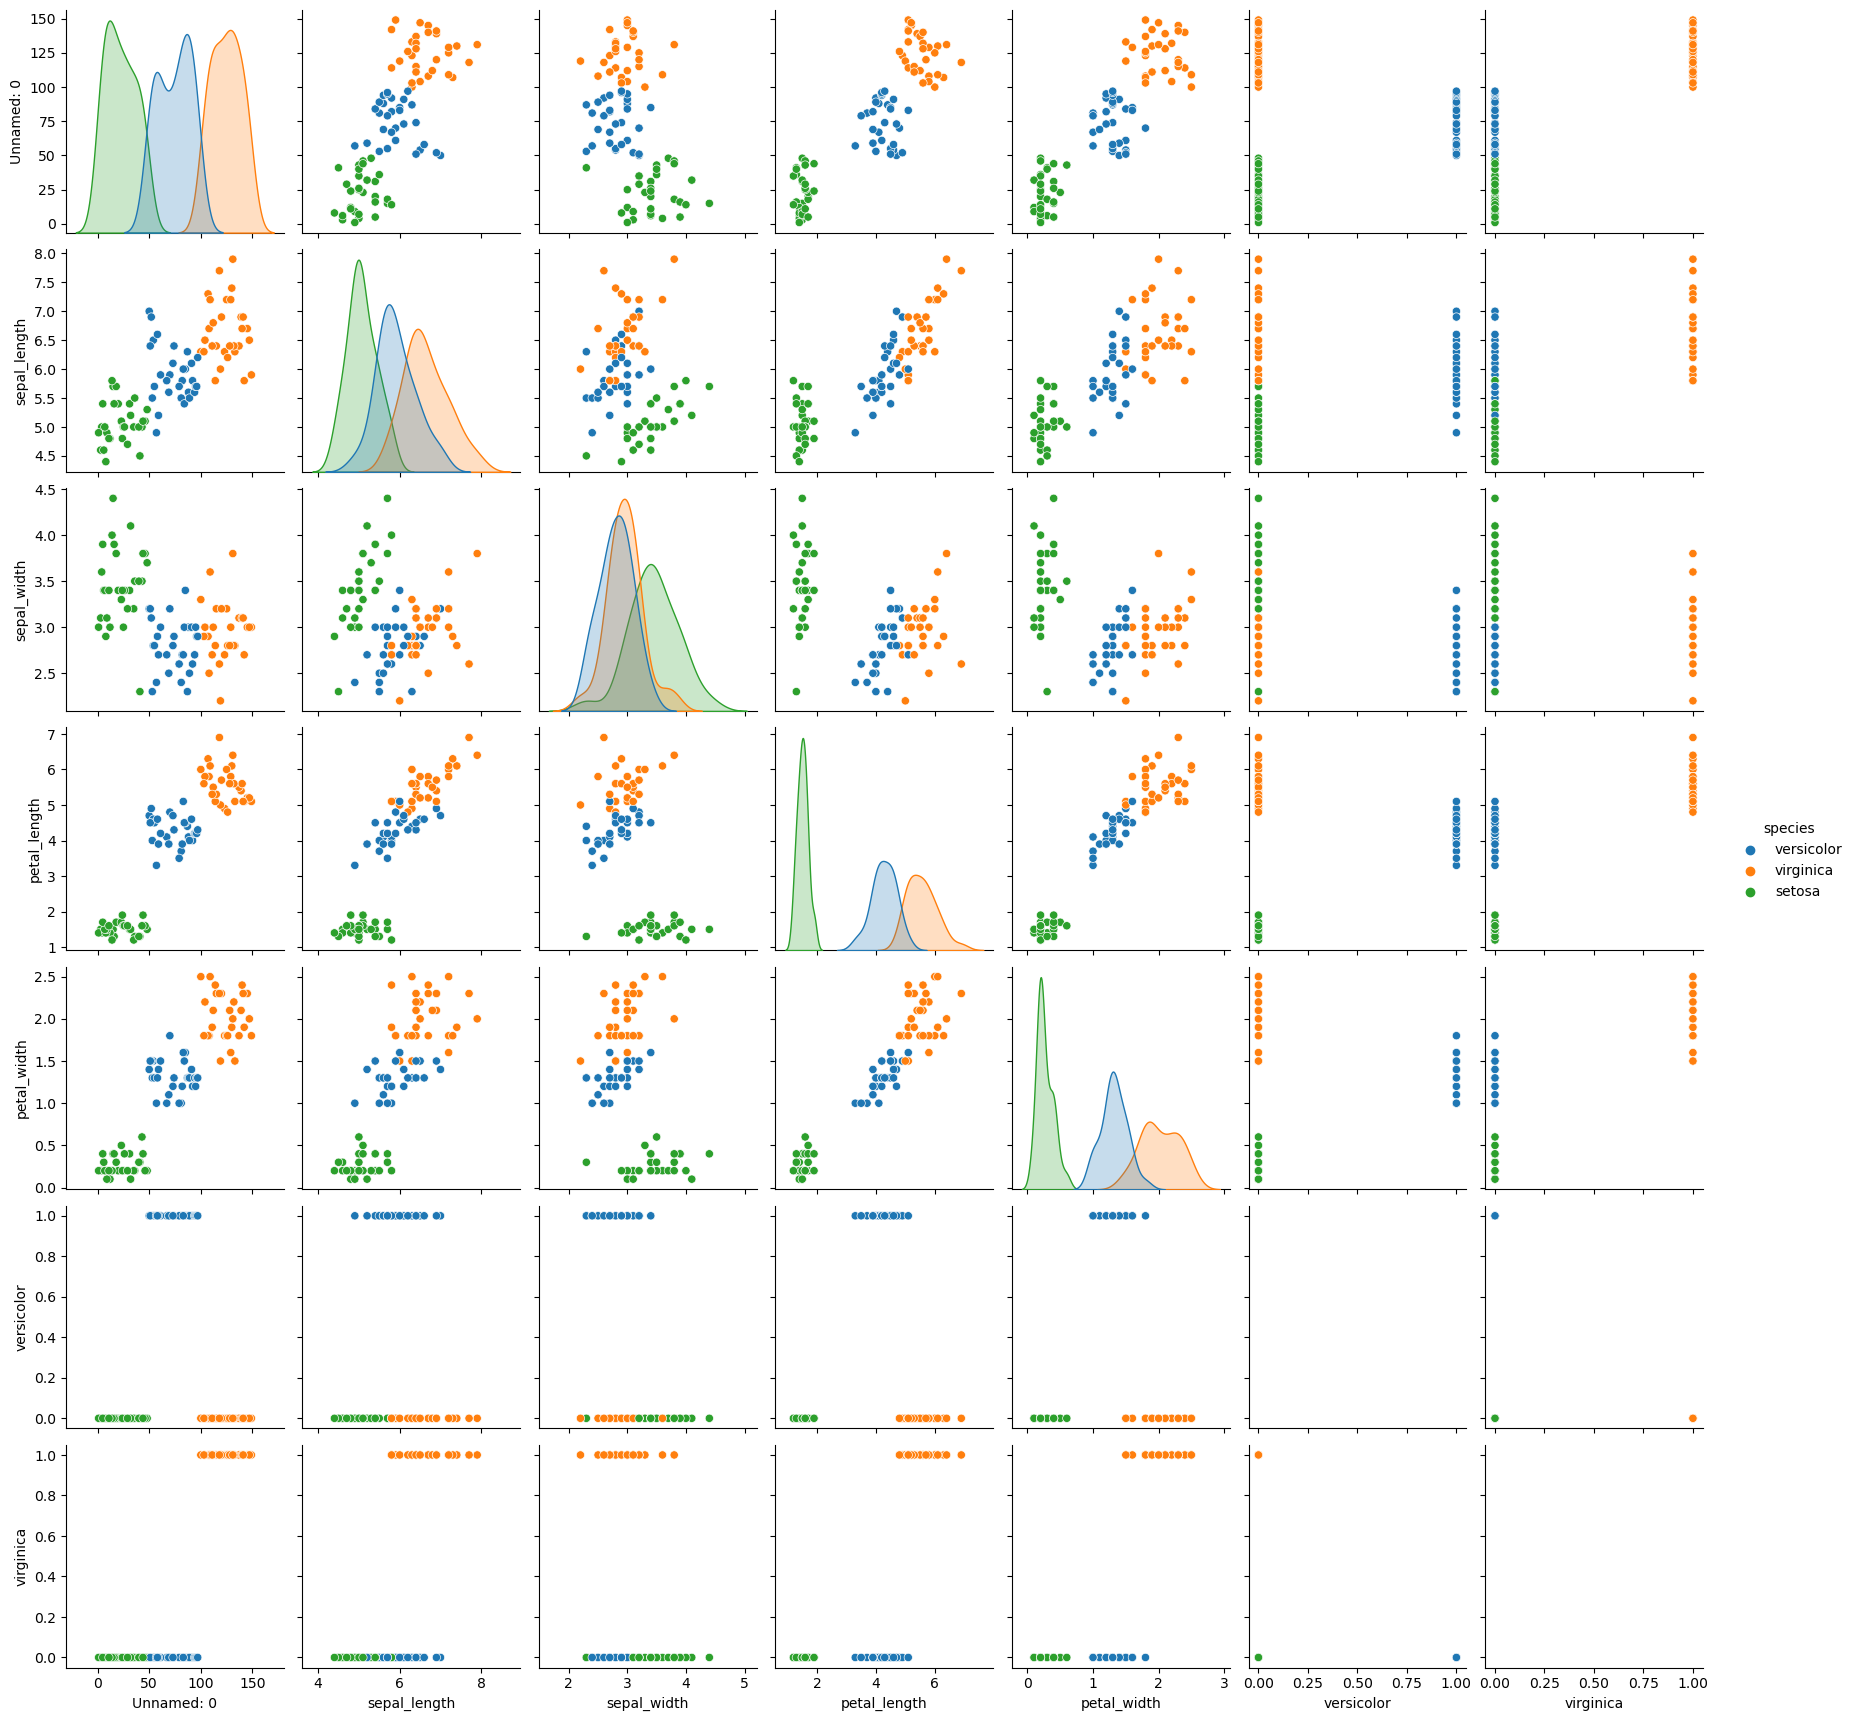

In [409]:
sns.pairplot(iris_train, hue='species')

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

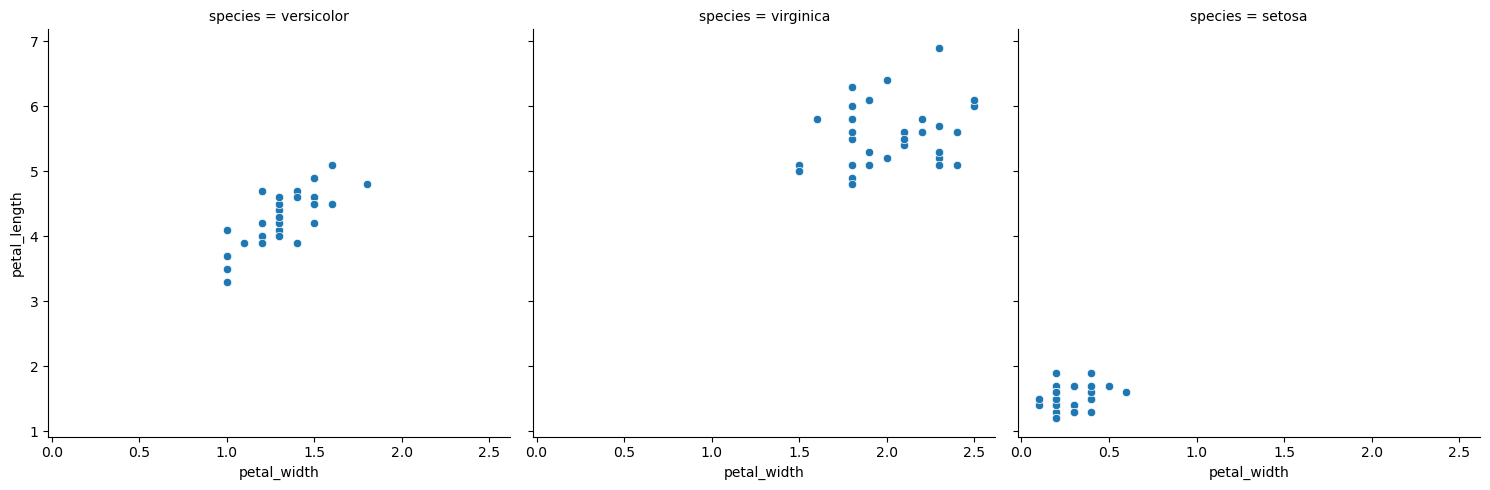

In [410]:
sns.relplot(iris_train, x='petal_width', y='petal_length', col='species')

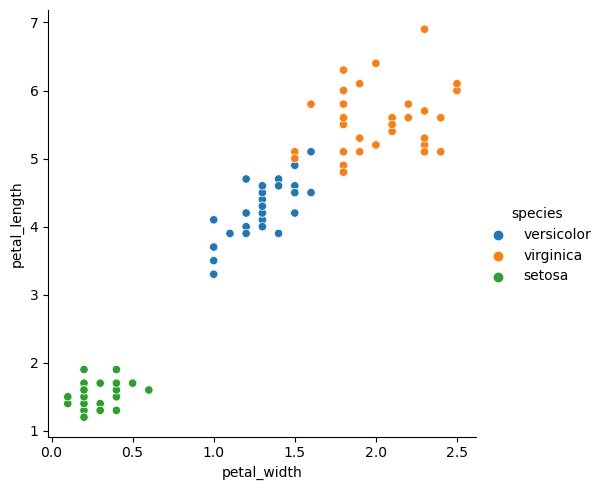

In [411]:
sns.relplot(iris_train, x='petal_width', y='petal_length', hue='species')

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [412]:
iris_train_melt = iris_train.melt(id_vars=['Unnamed: 0','species', 'virginica', 'versicolor'], var_name='all_dimensions', value_name='measurements')
iris_train_melt

,Unnamed: 0,species,virginica,versicolor,all_dimensions,measurements
0,70,versicolor,0,1,sepal_length,5.9
1,123,virginica,1,0,sepal_length,6.3
2,87,versicolor,0,1,sepal_length,6.3
3,3,setosa,0,0,sepal_length,4.6
4,15,setosa,0,0,sepal_length,5.7
...,...,...,...,...,...,...
355,11,setosa,0,0,petal_width,0.2
356,29,setosa,0,0,petal_width,0.2
357,96,versicolor,0,1,petal_width,1.3
358,44,setosa,0,0,petal_width,0.4


<Axes: xlabel='all_dimensions', ylabel='measurements'>

/usr/local/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


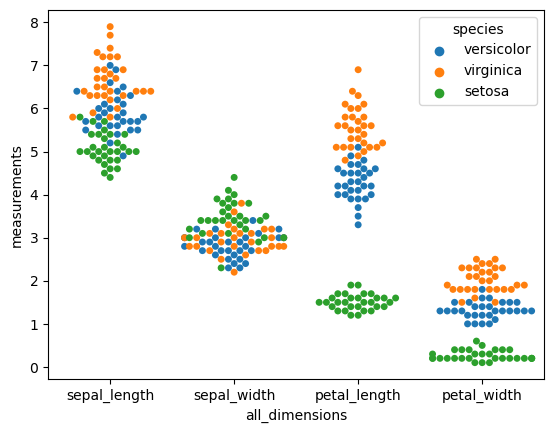

In [413]:
sns.swarmplot(iris_train_melt, x='all_dimensions', y='measurements', hue='species')

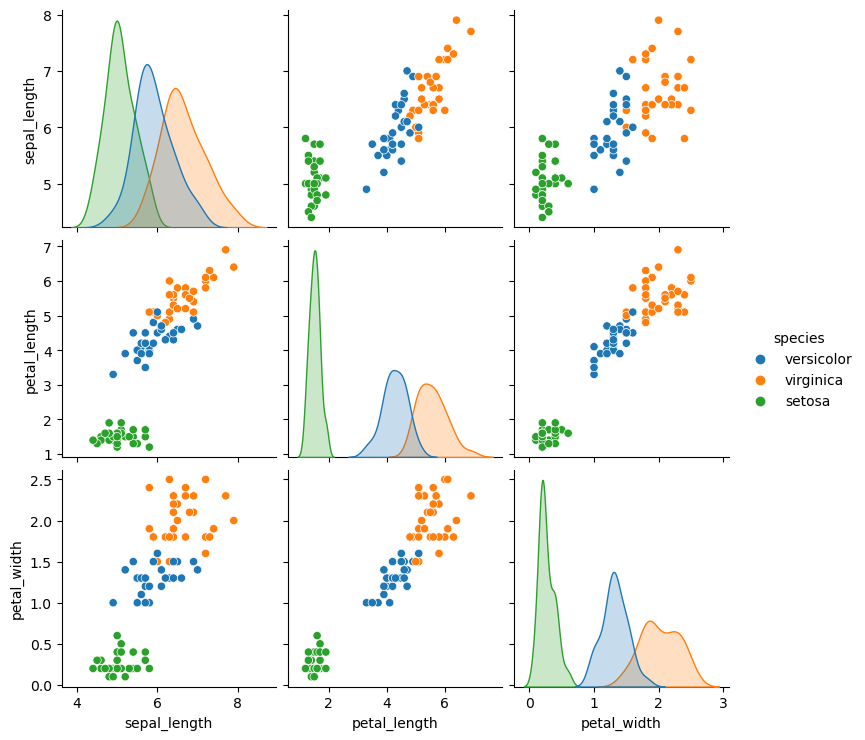

In [414]:
three_d = iris_train[['sepal_length', 'petal_length', 'petal_width', 'species']]
sns.pairplot(three_d, hue='species')

<Axes: xlabel='sepal_width', ylabel='sepal_length'>

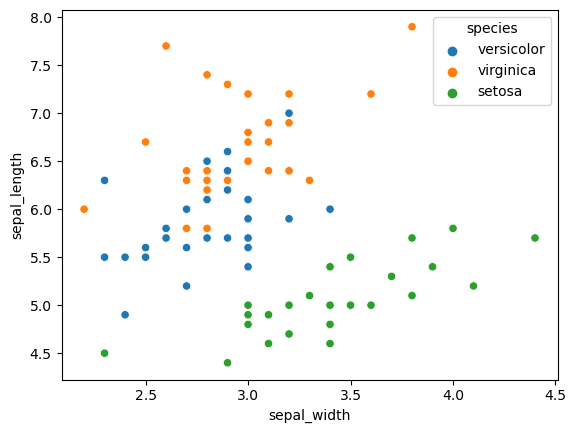

In [415]:
sns.scatterplot(iris_train, x='sepal_width', y='sepal_length', hue='species')

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Even though there is a clear distinction of the sizes of species which can be confirmed by ANOVA...is the petal_width to petal_length ratio consistent across species.

In [416]:
stats.pearsonr(x=iris_train.petal_width, y=iris_train.petal_length)

PearsonRResult(statistic=0.958664442968759, pvalue=8.1444720392091e-50)

In [417]:
setosa = iris_train[iris_train.species == 'setosa']
setosa

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
3,3,setosa,4.6,3.1,1.5,0.2,0,0
15,15,setosa,5.7,4.4,1.5,0.4,0,0
20,20,setosa,5.4,3.4,1.7,0.2,0,0
6,6,setosa,4.6,3.4,1.4,0.3,0,0
31,31,setosa,5.4,3.4,1.5,0.4,0,0
4,4,setosa,5.0,3.6,1.4,0.2,0,0
18,18,setosa,5.7,3.8,1.7,0.3,0,0
36,36,setosa,5.5,3.5,1.3,0.2,0,0
41,41,setosa,4.5,2.3,1.3,0.3,0,0
23,23,setosa,5.1,3.3,1.7,0.5,0,0


In [418]:
stats.pearsonr(x=setosa.petal_width, y=setosa.petal_length)

PearsonRResult(statistic=0.25441092565739226, pvalue=0.17487577258680118)

In [419]:
virginica = iris_train[iris_train.species == 'virginica']
virginica

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
123,123,virginica,6.3,2.7,4.9,1.8,0,1
145,145,virginica,6.7,3.0,5.2,2.3,0,1
130,130,virginica,7.4,2.8,6.1,1.9,0,1
149,149,virginica,5.9,3.0,5.1,1.8,0,1
139,139,virginica,6.9,3.1,5.4,2.1,0,1
125,125,virginica,7.2,3.2,6.0,1.8,0,1
133,133,virginica,6.3,2.8,5.1,1.5,0,1
100,100,virginica,6.3,3.3,6.0,2.5,0,1
108,108,virginica,6.7,2.5,5.8,1.8,0,1
137,137,virginica,6.4,3.1,5.5,1.8,0,1


In [420]:
stats.pearsonr(x=virginica.petal_width, y=virginica.petal_length)

PearsonRResult(statistic=0.24619363683245943, pvalue=0.18970460861425262)

In [421]:
versicolor = iris_train[iris_train['species'] == 'versicolor']
versicolor

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
70,70,versicolor,5.9,3.2,4.8,1.8,1,0
87,87,versicolor,6.3,2.3,4.4,1.3,1,0
53,53,versicolor,5.5,2.3,4.0,1.3,1,0
50,50,versicolor,7.0,3.2,4.7,1.4,1,0
54,54,versicolor,6.5,2.8,4.6,1.5,1,0
52,52,versicolor,6.9,3.1,4.9,1.5,1,0
81,81,versicolor,5.5,2.4,3.7,1.0,1,0
88,88,versicolor,5.6,3.0,4.1,1.3,1,0
85,85,versicolor,6.0,3.4,4.5,1.6,1,0
92,92,versicolor,5.8,2.6,4.0,1.2,1,0


In [422]:
stats.pearsonr(x=versicolor.petal_width, y=versicolor.petal_length)

PearsonRResult(statistic=0.7550517538751208, pvalue=1.4231988633089955e-06)

### As a group, there seems to be a strong correlation between petal width and petal length but as individual species not so much.  So I am going to run an ANOVA on the variables by creating a new column that shows the ratio of the two.

In [426]:
iris['ratio'] = iris.petal_length / iris.petal_width
iris

,Unnamed: 0,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica,ratio
0,0,setosa,5.1,3.5,1.4,0.2,0,0,7.000000
1,1,setosa,4.9,3.0,1.4,0.2,0,0,7.000000
2,2,setosa,4.7,3.2,1.3,0.2,0,0,6.500000
3,3,setosa,4.6,3.1,1.5,0.2,0,0,7.500000
4,4,setosa,5.0,3.6,1.4,0.2,0,0,7.000000
5,5,setosa,5.4,3.9,1.7,0.4,0,0,4.250000
6,6,setosa,4.6,3.4,1.4,0.3,0,0,4.666667
7,7,setosa,5.0,3.4,1.5,0.2,0,0,7.500000
8,8,setosa,4.4,2.9,1.4,0.2,0,0,7.000000
9,9,setosa,4.9,3.1,1.5,0.1,0,0,15.000000


In [425]:
iris_train, iris_validate, iris_test = split_data(iris, 'species')

In [427]:
iris = iris.drop(columns=['Unnamed: 0', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'versicolor', 'virginica'])

In [439]:
setosa = iris[:50]['ratio']
setosa
    

0      7.000000
1      7.000000
2      6.500000
3      7.500000
4      7.000000
5      4.250000
6      4.666667
7      7.500000
8      7.000000
9     15.000000
10     7.500000
11     8.000000
12    14.000000
13    11.000000
14     6.000000
15     3.750000
16     3.250000
17     4.666667
18     5.666667
19     5.000000
20     8.500000
21     3.750000
22     5.000000
23     3.400000
24     9.500000
25     8.000000
26     4.000000
27     7.500000
28     7.000000
29     8.000000
30     8.000000
31     3.750000
32    15.000000
33     7.000000
34     7.500000
35     6.000000
36     6.500000
37    14.000000
38     6.500000
39     7.500000
40     4.333333
41     4.333333
42     6.500000
43     2.666667
44     4.750000
45     4.666667
46     8.000000
47     7.000000
48     7.500000
49     7.000000
Name: ratio, dtype: float64

In [442]:
versicolor = iris[51:100]['ratio']
versicolor

51    3.000000
52    3.266667
53    3.076923
54    3.066667
55    3.461538
56    2.937500
57    3.300000
58    3.538462
59    2.785714
60    3.500000
61    2.800000
62    4.000000
63    3.357143
64    2.769231
65    3.142857
66    3.000000
67    4.100000
68    3.000000
69    3.545455
70    2.666667
71    3.076923
72    3.266667
73    3.916667
74    3.307692
75    3.142857
76    3.428571
77    2.941176
78    3.000000
79    3.500000
80    3.454545
81    3.700000
82    3.250000
83    3.187500
84    3.000000
85    2.812500
86    3.133333
87    3.384615
88    3.153846
89    3.076923
90    3.666667
91    3.285714
92    3.333333
93    3.300000
94    3.230769
95    3.500000
96    3.230769
97    3.307692
98    2.727273
99    3.153846
Name: ratio, dtype: float64

In [450]:
virginica = iris[101:149]['ratio']
virginica

101    2.684211
102    2.809524
103    3.111111
104    2.636364
105    3.142857
106    2.647059
107    3.500000
108    3.222222
109    2.440000
110    2.550000
111    2.789474
112    2.619048
113    2.500000
114    2.125000
115    2.304348
116    3.055556
117    3.045455
118    3.000000
119    3.333333
120    2.478261
121    2.450000
122    3.350000
123    2.722222
124    2.714286
125    3.333333
126    2.666667
127    2.722222
128    2.666667
129    3.625000
130    3.210526
131    3.200000
132    2.545455
133    3.400000
134    4.000000
135    2.652174
136    2.333333
137    3.055556
138    2.666667
139    2.571429
140    2.333333
141    2.217391
142    2.684211
143    2.565217
144    2.280000
145    2.260870
146    2.631579
147    2.600000
148    2.347826
Name: ratio, dtype: float64

ANOVA Null Hyp:
In terms of petal length to width ratio these species are the same
Alt Hyp:  They are in fact different in this metric
\alpha < 0.05

In [451]:
stats.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=88.18764496660982, pvalue=9.877579891140418e-26)

Document takeaways and any actions.

There is sufficient evidence here to reject the null hypothesis and state in terms of petal to width ratio these populations are different despite the high correlation seen with the pearson test.  Therefore taking a correlation of the three groups together as above and finding a high correlation and then separating them into their individual correlations illustrates the importance of conditionality when doing these analyses.  A pitfall to avoid in the future!!!


# Part II - Titanic 

Explore your titanic dataset more completely.

In [452]:
titanic_train.describe()

,Unnamed: 0,passenger_id,survived,pclass,sibsp,parch,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,446.677903,446.677903,0.383895,2.323970,0.514981,0.352060,31.058106,0.627341,0.651685,0.086142,0.711610
std,257.471048,257.471048,0.486789,0.822928,1.143856,0.759941,46.866121,0.483966,0.476883,0.280837,0.453438
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.500000,219.500000,0.000000,2.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,452.500000,452.500000,0.000000,3.000000,0.000000,0.000000,13.500000,1.000000,1.000000,0.000000,1.000000
75%,672.750000,672.750000,1.000000,3.000000,1.000000,0.000000,30.053100,1.000000,1.000000,0.000000,1.000000
max,890.000000,890.000000,1.000000,3.000000,8.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [453]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               534 non-null    int64  
 1   passenger_id             534 non-null    int64  
 2   survived                 534 non-null    int64  
 3   pclass                   534 non-null    int64  
 4   sex                      534 non-null    object 
 5   sibsp                    534 non-null    int64  
 6   parch                    534 non-null    int64  
 7   fare                     534 non-null    float64
 8   embark_town              533 non-null    object 
 9   alone                    534 non-null    int64  
 10  sex_male                 534 non-null    uint8  
 11  embark_town_Queenstown   534 non-null    uint8  
 12  embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 47.5+ KB


In [454]:
numeric = []
non_numeric = []
for col in titanic_train:
    if titanic_train[col].dtype != 'object':
        numeric.append(col)
    else: 
        non_numeric.append(col)
non_numeric

['sex', 'embark_town']

Determine drivers of the target variable

In [ ]:
truncated_titanic = titanic_train[numeric]

sns.pairplot(truncated_titanic, hue='survived')

In [ ]:
#Other ways from lecture:
# #get string columns
# str_col = df.columns [df.dtypes == 'object']
# str_col

# #find numeric columns
# num_col = df.select_dtypes(include='number').columns
# num_col

In [ ]:

for col in non_numeric:
    print(f'titanic_train.{col}')
    print(titanic_train[col].value_counts())
    print(titanic_train[col].value_counts(normalize=True))
    titanic_train[col].value_counts(dropna=False).plot.bar()
    plt.show()
    #sns.barplot(titanic_train[col], hue=titanic_train['survived'])

Determine if certain columns should be dropped

In [ ]:
titanic_train = titanic_train.drop(['Unnamed: 0', 'passenger_id', 'sex', 'embark_town'], axis=1)

In [ ]:
titanic_train

Determine if it would be valuable to bin some numeric columns

In [ ]:
titanic_train.sibsp.hist()

In [ ]:
titanic_train.parch.hist()

In [ ]:
titanic_train.fare.hist()

In [ ]:
sns.pairplot(titanic_train, hue='survived')

Determine if it would be valuable to combine multiple columns into one.

In [ ]:
No?

Does it make sense to combine any features?

In [ ]:
No?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

# Part III - Telco

Explore your telco data to discover drivers of churn

In [ ]:
numerical_telco = []
categorical_telco = []
for col in telco_train:
    if type(col) == 'Object':
        categorical_telco.append(col)
    else:
        numerical_telco.append(col)

In [ ]:
numerical_telco

In [ ]:
categorical_telco

In [ ]:
truncated_telco = telco_train[['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'churn_Yes']]

In [ ]:
sns.pairplot(truncated_telco, hue='churn_Yes')

In [ ]:
Determine if certain columns should be dropped

In [ ]:
Determine if it would be valuable to bin some numeric columns

In [ ]:
Determine if it would be valuable to combine multiple columns into one.

In [ ]:
What are your drivers of churn?

In [ ]:
Does it make sense to combine any features?

In [ ]:
Do you find any surprises?

In [ ]:
Document any and all findings and takeaways in your notebook using markdown.